In [1]:
import tqdm
import os
import sys
sys.path.append('../src/')

import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

from util import *
from model import *
from sampling import * 

%load_ext autoreload
%autoreload 2
%aimport util, model, sampling

In [ ]:
images_folder = '/media/aleksandar/Data/TestFiles/BladeOnly/'

img_list = [img_file.split('.')[0] for img_file in os.listdir(images_folder) if img_file.endswith('jpg')]

In [ ]:
len(img_list)

What are the images that have non-equal sizes in processed data?

In [ ]:
jpg_shapes = list()
png_shapes = list()
for img_file in tqdm.tqdm_notebook(img_list):
    
    jpg = Image.open(os.path.join(images_folder, img_file + '.jpg'))
    png = Image.open(os.path.join(images_folder, img_file + '.png'))
    
    jpg_shapes.append(jpg.size)
    png_shapes.append(png.size)

img_list = np.array(img_list)
jpg_shapes = np.array(jpg_shapes)
png_shapes = np.array(png_shapes)

img_list[np.any(jpg_shapes != png_shapes, axis=1)]

In [64]:
rpm = RegionProposalModel((100,100))

images_folder = '/media/aleksandar/Data/TT/BladeOnly/train/'

image_pairs = list(get_image_pairs(images_folder))

jpg_file, png_file = image_pairs[np.random.randint(len(image_pairs))]

jpg = load_jpg(jpg_file)
png = load_png(png_file)

In [65]:
from time import time
start = time()
windows, short_labels, full_labels = sample_windows(jpg, png)
end = time()

end - start

5.605596542358398

In [58]:
short_labels

[True, True, False, False]

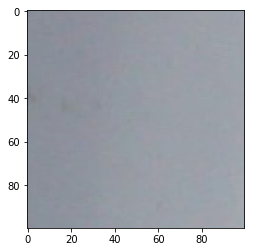

In [62]:
plt.imshow(windows[3])

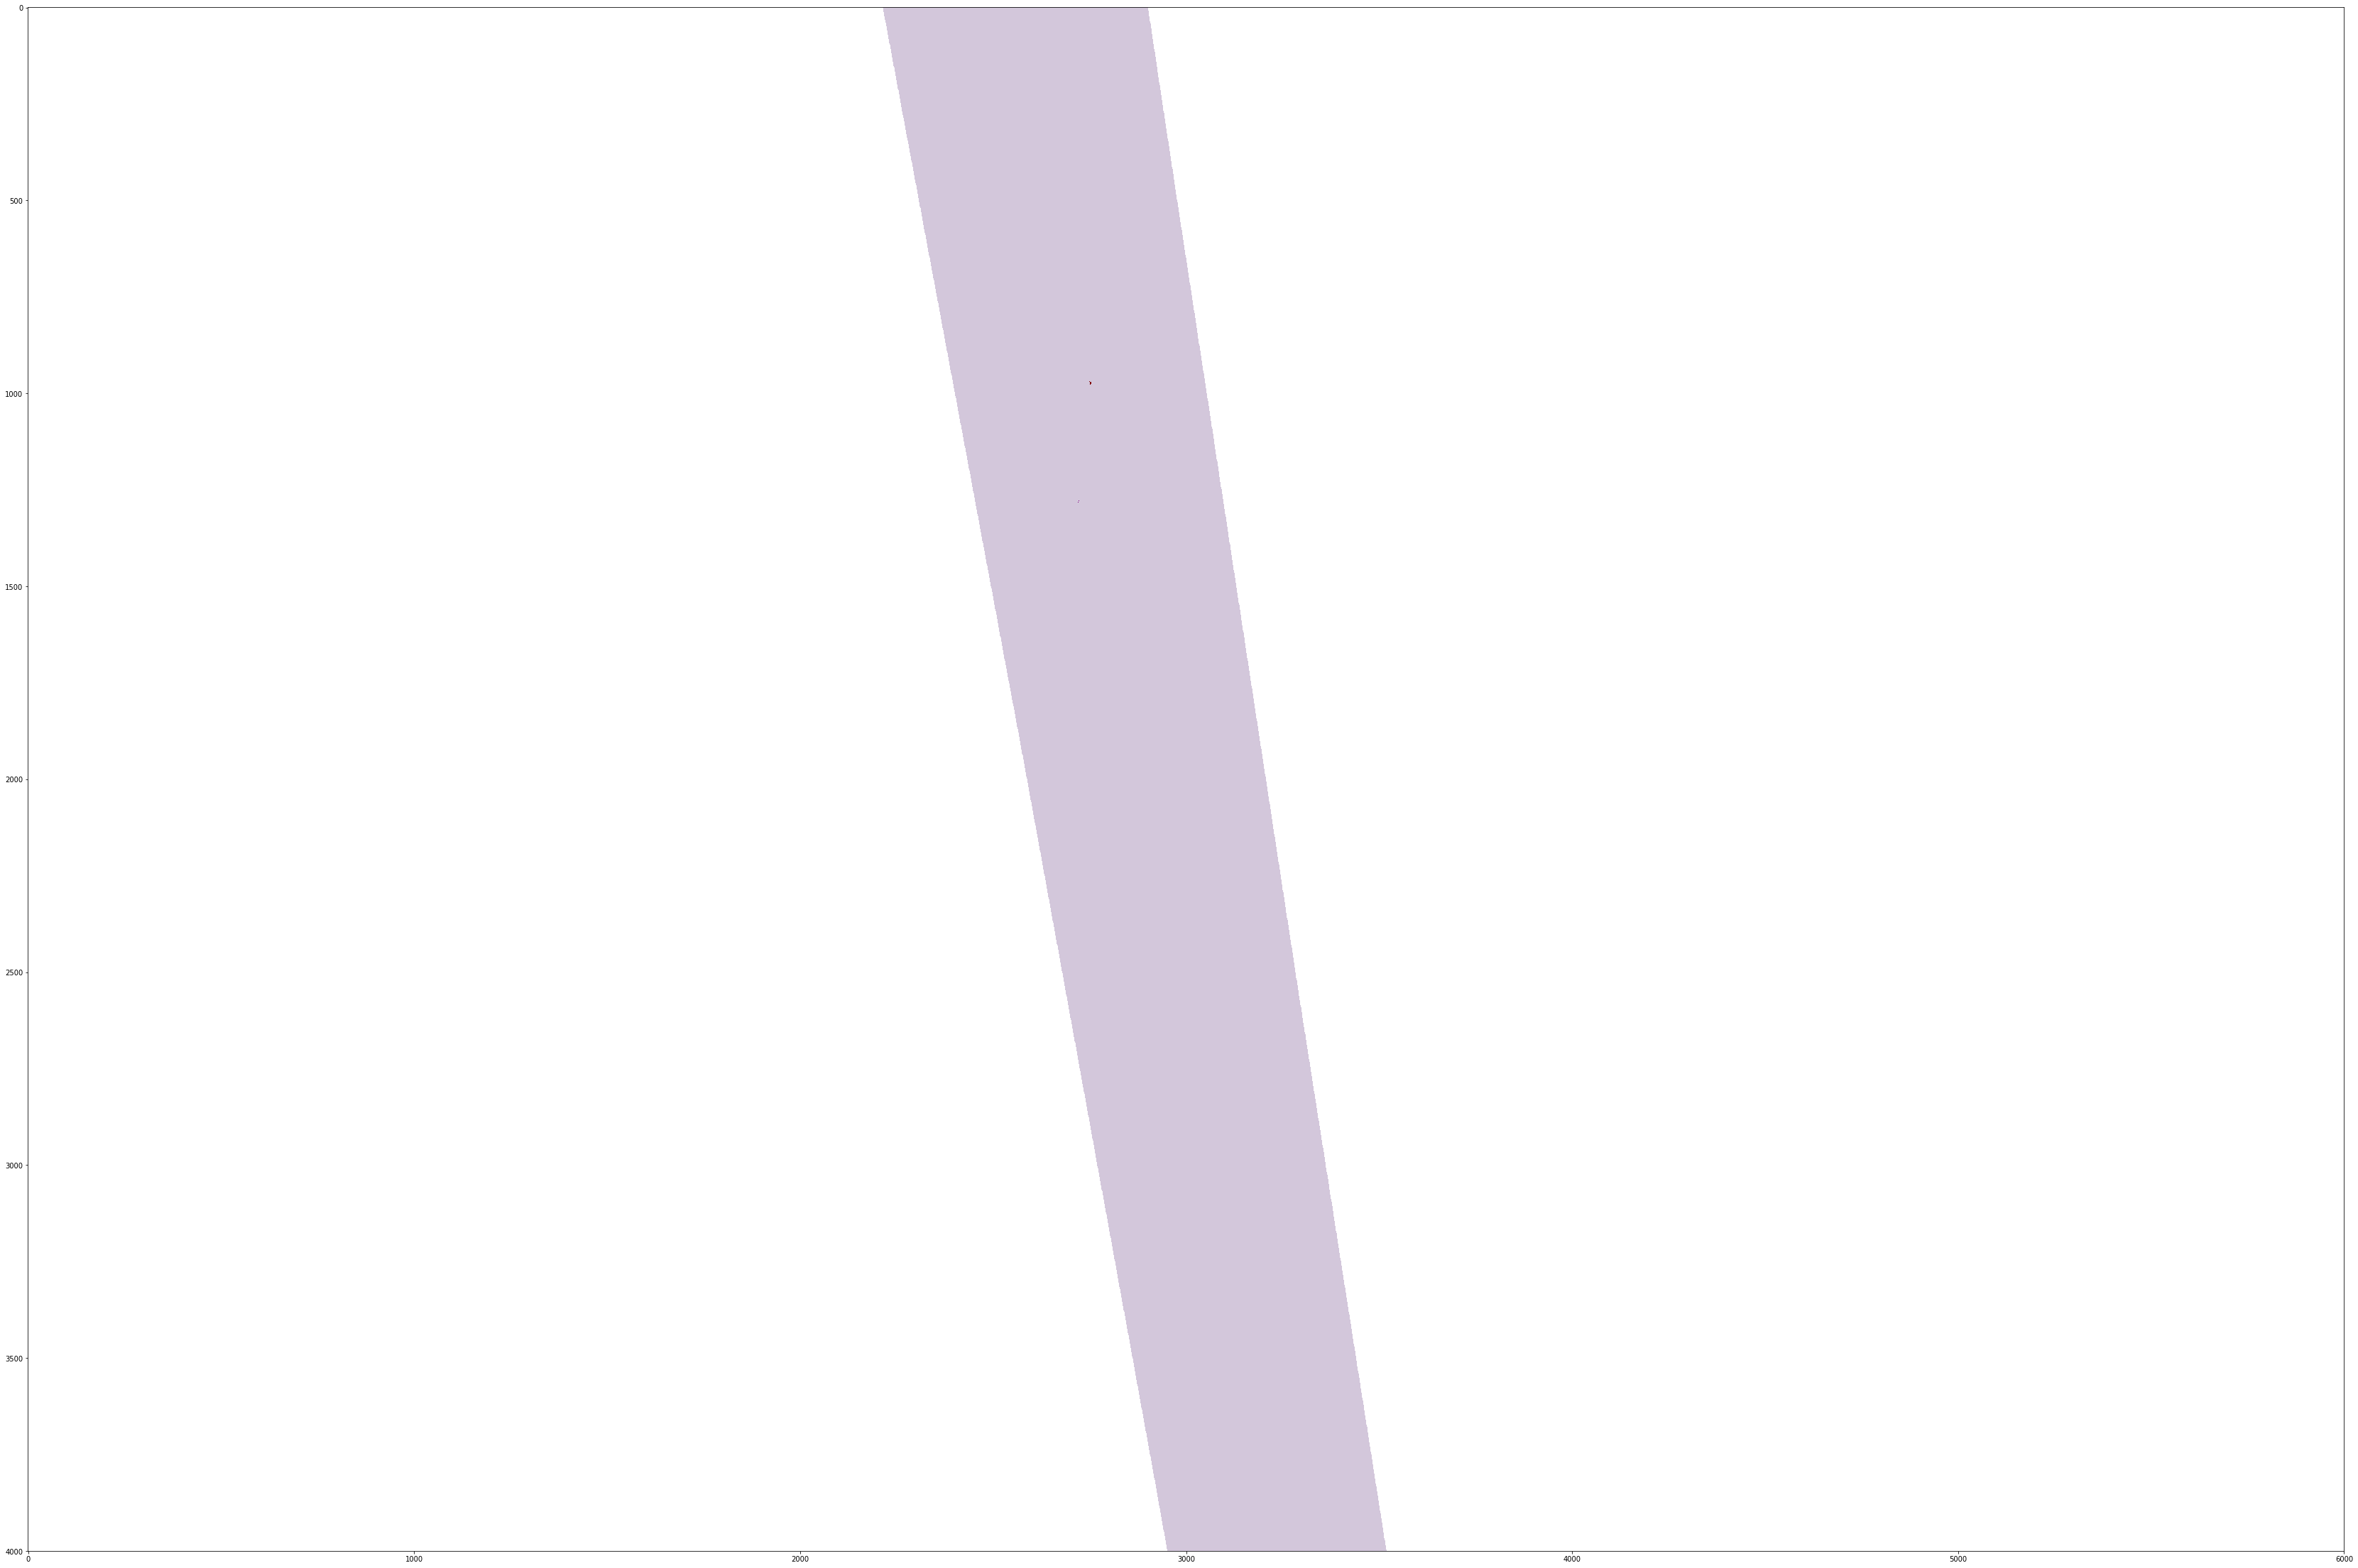

In [63]:
plt.figure(figsize=(80,40))
plt.imshow(png)

In [ ]:
structuringEl = cv2.getStructuringElement(cv2.MORPH_RECT, (100,100))
a = cv2.morphologyEx((png == COLOR_MAP[BLADE_LABEL]).all(axis=2).astype(np.uint8), cv2.MORPH_CLOSE, structuringEl)

plt.imshow(a)

In [ ]:
_, c, _ = cv2.findContours(a, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
#d = np.zeros_like(png)
d = cv2.drawContours(png, c, 0, 255)

#plt.imsave('/home/aleksandar/testimg.png', d)

In [ ]:
plt.imshow(cv2.Canny(a, 0, 0))

plt.imsave('/home/aleksandar/testimg2.png', cv2.Canny(a, 0, 0))

In [ ]:
len(c)

In [ ]:
start = time()
_, c, _ = cv2.findContours(a, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
end = time()

end - start

In [ ]:
start = time()
cv2.Canny(a, 0, 0)
end = time()

end - start

In [ ]:
windows, short_labels, full_labels = sample_windows2(jpg, png, 100, 100, ['Surface Voids', 'Peeling Paint', 'Chipped Paint'])

In [ ]:
unique_colors(png)

In [ ]:
unique_colors(cv2.resize(png, None, fx=1/6, fy=1/6, interpolation=cv2.INTER_CUBIC))

In [ ]:
plt.imshow(cv2.resize(png, None, fx=1/10, fy=1/10, interpolation=cv2.INTER_AREA))

In [ ]:
cv2.Canny((png == COLOR_MAP[BLADE_LABEL]).all(axis=2).astype(np.uint8), 0, 0)

In [ ]:
plt.imshow(jpg)cv2.rotate(jpg, cv2.ROTATE_180)

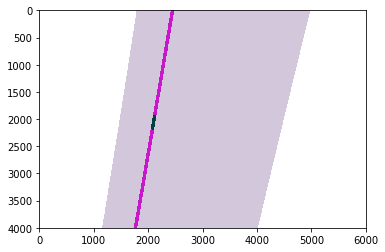

In [37]:
plt.imshow(cv2.flip(png, 2))

In [ ]:
import imutils

In [ ]:
plt.imshow(imutils.rotate_bound(jpg, np.random.uniform(-180,180)))

In [106]:
jpg_file = '/media/aleksandar/Data/TT/BladeOnly/train/B6BD3AC4-2BA1-4888-AB1E-E27BF6187AF2.jpg'
png_file = '/media/aleksandar/Data/TT/BladeOnly/train/B6BD3AC4-2BA1-4888-AB1E-E27BF6187AF2.png'

In [107]:
jpg = load_jpg(jpg_file)
png = load_png(png_file)

In [108]:
windows, short_labels, full_labels = sample_windows(jpg, png)

In [133]:
full_labels

['Surface Voids',
 'Surface Voids',
 'Surface Voids',
 'Surface Voids',
 'Surface Voids',
 'Peeling Paint',
 'Healthy Dino Tail',
 'Insects or temporary contamination',
 'Blade Edge',
 'Blade Edge',
 'Blade Edge',
 'Blade',
 'Blade',
 'Blade']

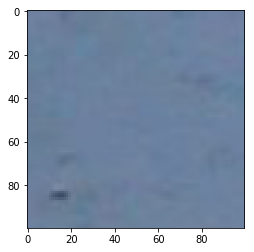

In [147]:
plt.imshow(windows[-10])

In [129]:
a = pd.read_csv('/media/aleksandar/Data/TT/BladeOnly/sample_new/targets.csv')

In [132]:
a.FindingCat.describe()

count            5019
unique              1
top       Healthy LPS
freq             5019
Name: FindingCat, dtype: object